# Decision Tree

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfData = pd.read_excel('outdoor_game.xlsx')
dfData.head()

,Outlook,Temperature,Humidity,Wind,Play
0,overcast,hot,high,weak,yes
1,overcast,cool,normal,strong,yes
2,overcast,mild,high,strong,yes
3,overcast,hot,normal,weak,yes
4,rain,mild,high,weak,yes


In [3]:
feature_name = dfData.iloc[:,0:4].columns.values
feature_name

array(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype=object)

In [4]:
x_values = np.array(dfData.iloc[:,0:4].values, 'str')
x_values[0]

array(['overcast', 'hot', 'high', 'weak'], dtype='<U8')

In [5]:
y_values = np.array(dfData.iloc[:,4:5].values, 'str')
y_values[0]

array(['yes'], dtype='<U3')

In [6]:
from id3 import Id3Estimator, export_text, export_graphviz
clf = Id3Estimator()
clf.fit(x_values, y_values.ravel(), check_input=True)
print(export_text(clf.tree_, feature_name))

C:\Users\Jorge\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Jorge\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)



Outlook overcast: yes (4) 
Outlook rain
|   Wind strong: no (2) 
|   Wind weak: yes (3) 
Outlook sunny
|   Humidity high: no (3) 
|   Humidity normal: yes (2) 



In [7]:
export_graphviz(clf.tree_,'tree.dot', feature_name)

<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

In [8]:
import pydot
(graph, )=pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

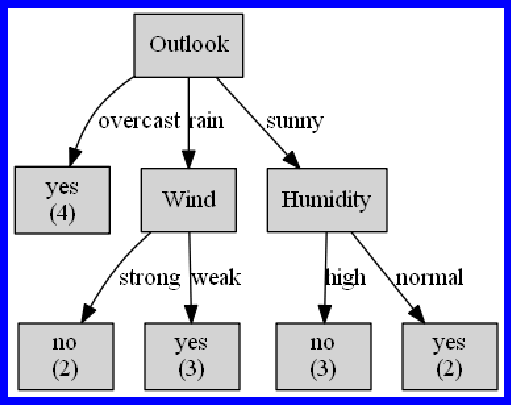

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

figure(num=None, figsize=(8, 8), dpi=80, facecolor='b', edgecolor="k")
img = mpimg.imread('tree.png')
plt.axis('off')
plt.imshow(img)